<h2>Notebook to explore fake news datasets</h2>

<h3>Install dependencies</h3>

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install datasets
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.7 MB 5.9 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/25.7 MB 5.8 MB/s eta 0:00:05
   ----- ---------------------------------- 3.4/25.7 MB 5.8 MB/s eta 0:00:04
   ------- -------------------------------- 4.7/25.7 MB 5.8 MB/s eta 0:00:04
   --------- ------------------------------ 6.0/25.7 MB 5.8 MB/s eta 0:00:04
   ----------- ---------------------------- 7.3/25.7 MB 5.8 MB/s eta 0:00:04
   ------------- --------------

<h2>LIAR2 DATASET</h2>

Dataset description

- ID: identificador único.

- Label: calificación de veracidad asignada por PolitiFact (seis niveles: Pants-on-Fire, False, Barely-True, Half-True, Mostly-True, True).

- Statement: texto completo de la afirmación.

- Subject: tema o categoría de la afirmación (p. ej., economía, salud, política).

- Speaker: persona que emite la afirmación.

- Speaker_job: cargo o puesto de trabajo del orador.

- State_info: estado de EE. UU. asociado al orador o al contexto de la afirmación.

- Party_affiliation: afiliación política del orador (Demócrata, Republicano, Independiente, etc.).

- Barely_true_count, false_count, half_true_count, mostly_true_count, pants_on_fire_count: número de afirmaciones previas del mismo orador clasificadas en cada nivel de veracidad (hasta el momento de la nueva declaración).

- Context: información adicional sobre el entorno de la afirmación (lugar, evento, medio de comunicación, etc.)

- Date: fecha en la que se hizo la afirmación (formato YYYY-MM-DD).

- Justification: texto de la explicación o argumentación que el equipo de fact-checking aporta para motivar la calificación dada a la afirmación.

- Credibility_history: historial agregado de credibilidad del orador, que resume de forma conjunta sus antiguos recuentos de veracidad como un indicador de reputación previa.

Load LIAR2 dataset

In [3]:
from datasets import load_dataset

liar_dataset = load_dataset("chengxuphd/liar2")

e:\Master\TFM\FakeNewsReactApp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\Master\TFM\FakeNewsReactApp\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Usuario\.cache\huggingface\hub\datasets--chengxuphd--liar2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate dev

Primer vistazo al conjunto de datos

In [4]:
print(liar_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 18369
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 2297
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 2296
    })
})


In [9]:
import pandas as pd

df_train = pd.DataFrame(liar_dataset["train"])

print("Shape train:", df_train.shape)

df_train.head()

Shape train: (18369, 16)


,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


Distribución de la variable 'label' en el conjunto de entrenamiento

In [12]:
label_counts = df_train['label'].value_counts().sort_index()

label_counts

label
0    2425
1    5284
2    2882
3    2967
4    2743
5    2068
Name: count, dtype: int64

Histograma de frecuencia de cada uno de los valores de la variable 'label'

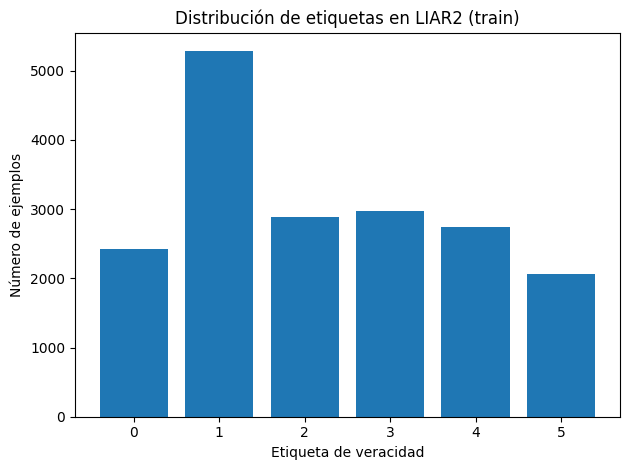

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Distribución de etiquetas en LIAR2 (train)")
plt.xlabel("Etiqueta de veracidad")
plt.ylabel("Número de ejemplos")
plt.tight_layout()
plt.show()

- El nivel 1 (“false”) es el más frecuente, con algo más de 500 ejemplos, mientras que el nivel 5 (“true”) es el menos común, con unos 2000.

- La relación entre la clase más abundante y la menos abundante es de alrededor de 2.5×, un desequilibrio moderado. Para un enfoque de regresión continua esto no suele afectar tanto como en clasificación, pero se va a tener en cuenta (por ejemplo, ajustando pesos o usando sampling).

Histograma de la longitud de las declaraciones

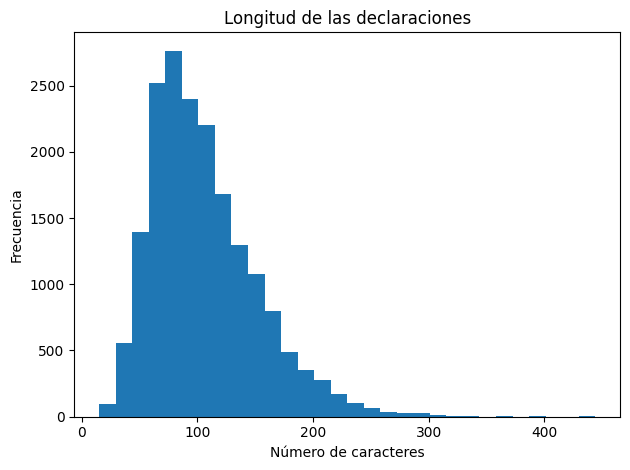

In [16]:
df_train["stmt_len"] = df_train["statement"].str.len()
plt.figure()
plt.hist(df_train["stmt_len"], bins=30)
plt.title("Longitud de las declaraciones")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

- La gran mayoría de los enunciados (“statements”) tiene entre 60 y 140 caracteres, lo cual indica que no son excesivamente largos.

- Existen muy pocos casos por encima de 300 caracteres, por lo que fijar un límite de truncamiento en torno a 200–256 tokens cubriría casi todas las entradas sin perder información relevante.